<a href="https://colab.research.google.com/github/codeandteawithsami/LangGraph-Demo/blob/main/Rags_with_Complex_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-modal RAG with LangChain

## SetUp

Install the dependencies you need to run the notebook.

In [ ]:
# for linux
# !apt-get install poppler-utils tesseract-ocr libmagic-dev

# for mac
# !brew install poppler tesseract libmagic

In [1]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.1 MB/s eta 0:00:00
   ━

In [33]:
import os

# keys for the services we will use

os.environ["OPENAI_API_KEY"] = "sk-..."
os.environ["GROQ_API_KEY"] = "sk-..."
os.environ["LANGCHAIN_API_KEY"] = "sk-..."
os.environ["LANGCHAIN_TRACING_V2"] = "true"


## Extract the data

Extract the elements of the PDF that we will be able to use in the retrieval process. These elements can be: Text, Images, Tables, etc.

In [6]:
# for linux
!apt-get install poppler-utils tesseract-ocr libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,086 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 291 kB in 1s (271 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler-u

### Partition PDF tables, text, and images

In [7]:
from unstructured.partition.pdf import partition_pdf

output_path = "./content/"
file_path = '/content/applsci-3557906.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [8]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [9]:
# Each CompositeElement containes a bunch of related elements.
# This makes it easy to use these elements together in a RAG pipeline.

chunks[3].metadata.orig_elements

In [12]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

IndexError: list index out of range

In [13]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]

# Check if the list is not empty before trying to access the first element
if chunk_images:
    print("Found images in the chunk:")
    print(chunk_images[0].to_dict())
else:
    print("No images found in this specific chunk.")

No images found in this specific chunk.


### Separate extracted elements into tables, text, and images

In [14]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [15]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

#### Check what the images look like

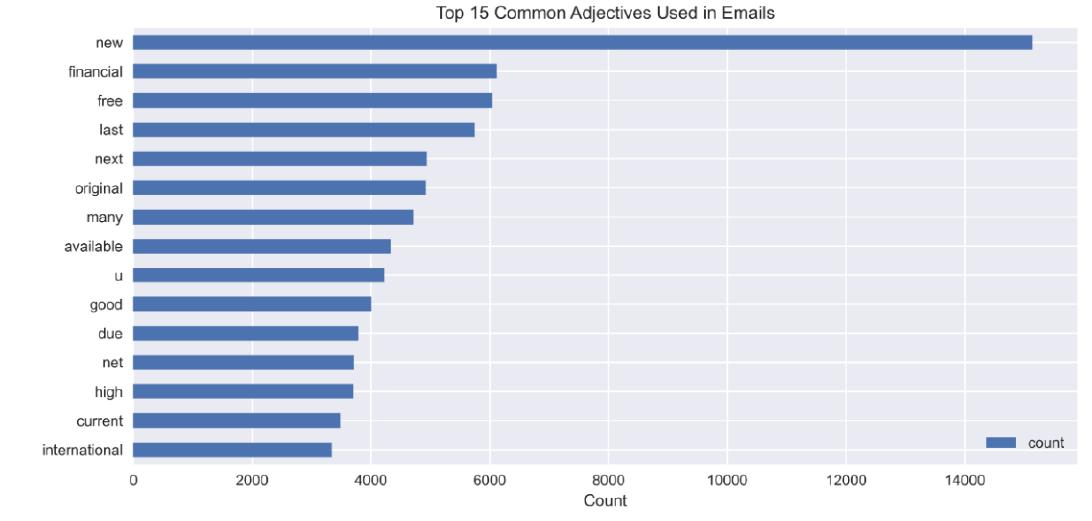

In [19]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[5])

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.

In [20]:
%pip install -Uq langchain-groq

In [34]:
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [35]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
# model = ChatGroq(temperature=0.5, model="gpt-4o-mini")
model = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [36]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [37]:
text_summaries

["The article discusses a hybrid model combining Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) for spam email detection. It highlights the increasing prevalence of spam emails, which waste resources and pose security risks. Traditional spam detection methods have limitations, necessitating the use of machine learning and deep learning techniques. The proposed model achieved a training accuracy of 89%, testing accuracy of 90%, and an AUC of 98%, demonstrating strong classification capabilities. The model's precision is 90% and recall is 84%, effectively minimizing false positives and negatives. The research aims to enhance spam detection in a landscape where spammers continually adapt their tactics.",
 "The model enhances contextual awareness by addressing long-term dependencies and complex relationships in extensive text datasets, allowing robust functionality across various domains and languages. It outlines a structured spam email detection system that includes data c

### Image summaries

We will use gpt-4o-mini to produce the image summaries.

In [38]:
%pip install -Uq langchain_openai

In [39]:
from langchain_openai import ChatOpenAI

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(images)

In [40]:
image_summaries

["I'm unable to provide a detailed description of the image you've shared, as it appears to be a logo or a watermark from the publisher MDPI. It doesn't contain specific graphs or bar plots related to transformers architecture.\n\nIf you have an image with graphs or plots that you would like me to describe, please upload it, and I'll do my best to help!",
 'The image outlines an "Email Spam Classification System," represented in a flowchart format that highlights various components and processes involved in the classification of emails as spam or legitimate.\n\n### Top Level and Title\n- At the top, the title "Email Spam Classification System" is prominently displayed.\n\n### Data Collection\n- On the left, the "Email Data Collection" box is illustrated in blue. It lists:\n  - Public Email Datasets\n  - Spam/Ham Repositories\n  - Email Headers\n  - Email-Body Content\n- An arrow from this box points to the next process, indicating a flow of information.\n\n### Email Preprocessing\n- Ne

In [41]:
print(image_summaries[1])

The image outlines an "Email Spam Classification System," represented in a flowchart format that highlights various components and processes involved in the classification of emails as spam or legitimate.

### Top Level and Title
- At the top, the title "Email Spam Classification System" is prominently displayed.

### Data Collection
- On the left, the "Email Data Collection" box is illustrated in blue. It lists:
  - Public Email Datasets
  - Spam/Ham Repositories
  - Email Headers
  - Email-Body Content
- An arrow from this box points to the next process, indicating a flow of information.

### Email Preprocessing
- Next is the "Email Preprocessing" box, colored in orange, which contains several components:
  - HTML Cleaning
  - URL Extraction
  - Header Analysis
  - Text Normalization
- Arrows show that data flows from the "Email Data Collection" to this preprocessing stage.

### Feature Engineering
- Below the preprocessing step is the "Feature Engineering" box, also colored orange, 

## Load data and summaries to vectorstore

### Create the vectorstore

In [42]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

<ipython-input-42-278287695>:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
<ipython-input-42-278287695>:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())


### Load the summaries and link the to the original data

In [45]:
table_summaries

[]

In [46]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
# table_ids = [str(uuid.uuid4()) for _ in tables]
# summary_tables = [
#     Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
# ]
# print("summary_tables:",summary_tables)
# retriever.vectorstore.add_documents(summary_tables)
# retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

### Check retrieval

In [47]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [48]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

20 of 21

578

579

580

581

582

583

584

585

586

587

588

589

590

591

592

593

594

595

596

597

598

599

600

601

602

603

604

605

606

607

608

609

610

611

612

613

614

615

616

617

618

619

620

621

622

623

624

625

626

627

628

631

632

Version April 18, 2025 submitted to Appl. Sci.

Disclaimer/Publisher’s Note: The statements, opinions and data contained in all publications are solely those of the individual author(s) and contributor(s) and not of MDPI and/or the editor(s). MDPI and/or the editor(s) disclaim responsibility for any injury to people or property resulting from any ideas, methods, instructions or products referred to in the content.

21 of 21

633

634

635

--------------------------------------------------------------------------------
20 of 21

578

579

580

581

582

583

584

585

586

587

588

589

590

591

592

593

594

595

596

597

598

599

600

601

602

603

604

605

606

607

608

609

610

611

612

613

614

615



## RAG pipeline

In [66]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Must give reference of answer like from table 4 or from image 4 etc.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [80]:
response = chain.invoke(
    "How does the LSTM-GRU model compare with Naïve Bayes and Random Forest models in terms of accuracy?"
)

print(response)

The LSTM-GRU model achieves an accuracy of 90%, which is higher than Naïve Bayes' accuracy of 85% and lower than Random Forest's accuracy of 97% (as shown in Table 4). This indicates that while the LSTM-GRU model outperforms Naïve Bayes, it does not reach the accuracy level of Random Forest. (Reference: Table 4)


In [62]:
response = chain_with_sources.invoke(
    "What dropout values were applied after the GRU and SimpleRNN layers?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

Response: After the GRU layer, a dropout value of 0.2 was applied, and after the SimpleRNN layer, a dropout value of 0.7 was applied.


Context:
4. Model Architecture

The model design contains four main layers: an embedding section followed by recurrent neural networks (GRU and SimpleRNN) and regularization and then density output for binary predictions. During model development the best performing configu-

339

340

346

347

348

349

Version April 18, 2025 submitted to Appl. Sci.

12 of 21

ration eliminated the standalone LSTM layer from the architecture shown in Table 3. The model used GRU together with SimpleRNN layers for achieving optimal performance alongside computer processing efficiency. The study first made references to LSTM layers in its title and introduction section as part of preliminary experimental setups. The final model architecture integrated simpler recurrent units instead of the LSTM layer after the optimization process of hyperparameter tuning. This change d

## References

- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)